### In this version of the hexagon spec models, I included a scale factor in the training data, which changes the spacing used in the simulations, and use the peak information instead of points in the specs.

In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data

#energy = (pd.read_csv('HexagonBias_v3.csv', header=None)*1000).round().astype(int)
#energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v5.csv', header=None)*1000).round().astype(int)

#energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

col_names = ['deltaI', 'deltaR', 'scale_factor']+ peak_names + locs_names + width_names + prom_names

#data = pd.read_csv('HexagonTrainingData052818_specPoints.csv', header = None, names = col_names)
#data = pd.read_csv('HexagonTrainingData060518_v3.csv', header = None, names = col_names)
data = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData061518_v6.csv', header = None, names = col_names)


data.head()

X = data.drop(['deltaI', 'deltaR','scale_factor'], axis = 1)
Y = data[['deltaI', 'deltaR', 'scale_factor']]

ts1 = 0.3
rs1 = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1 )
data.head()

,deltaI,deltaR,scale_factor,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,0.81472,-0.14798,0.92540,5.5757,3.6072,2.7947,2.0826,-0.342,-0.214,-0.030,0.196,0.011861,0.024360,0.035346,0.043770,5.3551,3.2287,2.2553,1.3712
1,0.91338,-0.57749,0.91951,6.7330,4.4629,3.4151,2.4869,-0.340,-0.210,-0.026,0.202,0.010046,0.020206,0.030172,0.037996,6.5560,4.1515,2.9618,1.8460
2,0.27850,-0.71176,1.09150,12.3840,8.3863,6.1949,4.2810,-0.370,-0.278,-0.146,0.022,0.004192,0.007890,0.012702,0.017985,12.2900,8.2139,5.9374,3.9402
3,0.96489,-1.32320,1.09410,7.8682,5.2212,3.9698,2.8794,-0.368,-0.274,-0.140,0.032,0.006334,0.012708,0.019517,0.026521,7.7181,4.9546,3.5743,2.4079
4,0.95717,-0.80837,1.06010,7.2495,4.8448,3.6756,2.6807,-0.364,-0.266,-0.124,0.056,0.007281,0.014348,0.021969,0.029580,7.0867,4.5570,3.2531,2.1756


## Using the Best Models on the Hexagon Data

### Statsmodels

 
RMSE on test data: 0.15587633688789693 for  Delta I
R^2 Score on test data: 0.7068151333017709 for Delta I
 
RMSE on test data: 0.2552091713262626 for  Delta R
R^2 Score on test data: 0.6843668550588073 for Delta R
 
RMSE on test data: 0.2552091713262626 for  Delta R Zoomed In
R^2 Score on test data: 0.6843668550588073 for Delta R Zoomed In
 
RMSE on test data: 0.02379048652509393 for  Scale Factor
R^2 Score on test data: 0.8289927374893649 for Scale Factor
The average residual for predict: 0.123
Residual is this percent of predict range 6.298 %
The average residual for predict: 0.202
Residual is this percent of predict range 6.604 %
The average residual for predict: 0.0109
Residual is this percent of predict range 1.222 %


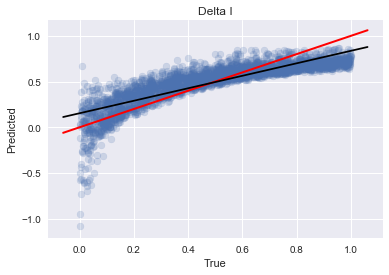

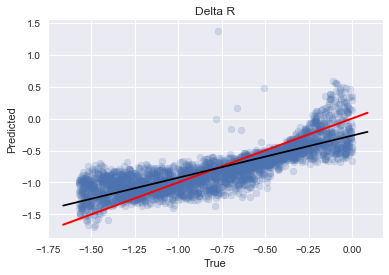

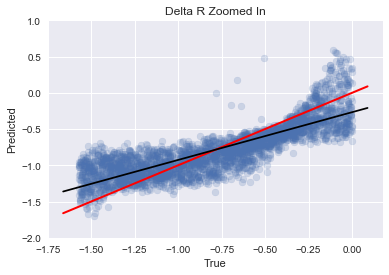

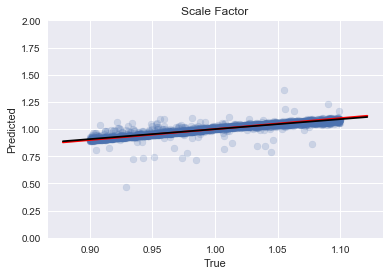

In [3]:
#Initialize and fit OLS model for deltaI 
model_OLS_I = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R = sm.OLS(Y_train['deltaR'], X_train)
model_OLS_sf = sm.OLS(Y_train['scale_factor'], X_train)

results_OLS_I = model_OLS_I.fit()
results_OLS_R = model_OLS_R.fit()
results_OLS_sf = model_OLS_sf.fit()

#Make predictions on testing data
predictions_OLS_I = results_OLS_I.predict(X_test) # make the predictions by the model
predictions_OLS_R = results_OLS_R.predict(X_test)
predictions_OLS_sf = results_OLS_sf.predict(X_test)

#print(results_OLS_I.summary())
#print(results_OLS_R.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R')
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R Zoomed In')
ylim([-2,1])
plotSummary(Y_test['scale_factor'], predictions_OLS_sf, 'Scale Factor')
ylim([0,2])


myResiduals(Y_test['deltaI'], predictions_OLS_I)
myResiduals(Y_test['deltaR'], predictions_OLS_R)
myResiduals(Y_test['scale_factor'], predictions_OLS_sf)

### Decision Tree

 
RMSE on test data: 0.07687836096780112 for  deltaI Depth 30
R^2 Score on test data: 0.9286836022595626 for deltaI Depth 30
 
RMSE on test data: 0.16339610983245473 for  deltaR Depth 30
R^2 Score on test data: 0.8706181153592017 for deltaR Depth 30
 
RMSE on test data: 0.03186587872875241 for  scale factor - DT
R^2 Score on test data: 0.6931969267481036 for scale factor - DT
 
Regression - Decision Tree -  Score:  0.8850604514785149 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.91411122 0.91712775 0.91579627 0.91390943 0.91718185 0.9168631
 0.9102184  0.89977502 0.91759435 0.90975105]


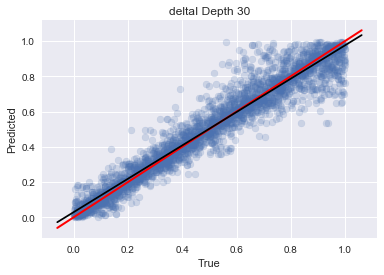

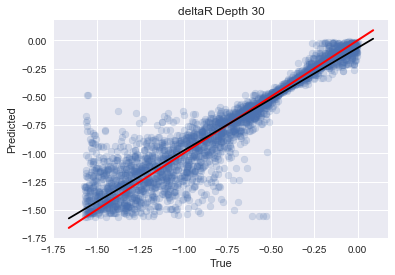

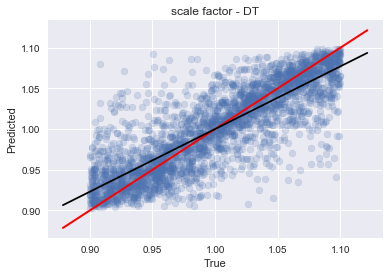

In [4]:
#Initialize the model
regr_DT = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2)

#Fit the model
regr_DT.fit(X_train, Y_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_DT.feature_importances_.T, columns = ['Regr - DT']) 

data1.index = X_train.columns

#print(data1[data1['Regr - DT']>0.001])


#Use model to predict
y_pred_DT = regr_DT.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], y_pred_DT[:,0], 'deltaI Depth 30')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], y_pred_DT[:,1], 'deltaR Depth 30')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y_test['scale_factor'], y_pred_DT[:,2], 'scale factor - DT')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT.score(X_test,Y_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X, Y, cv=10))

## Random Forest


Score - Random Forest: 0.9434126191501692 for delta I/R 10
 
RMSE on test data: 0.05283061583468069 for  deltaI 10
R^2 Score on test data: 0.9663215175924962 for deltaI 10
 
RMSE on test data: 0.11650754500101548 for  deltaR 10
R^2 Score on test data: 0.9342193515918769 for deltaR 10
 
RMSE on test data: 0.013740030181765055 for  Scale Factor
R^2 Score on test data: 0.9429595056143782 for Scale Factor


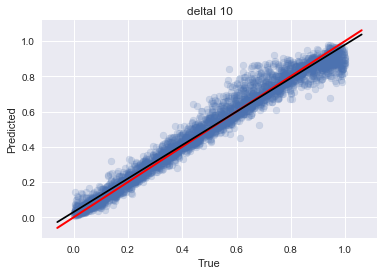

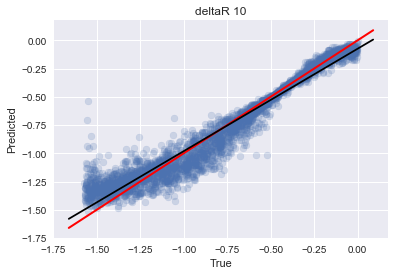

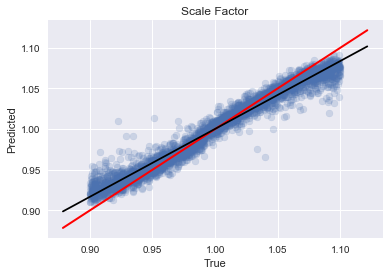

In [46]:
rs = 42
regr_RF = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF = regr_RF.fit(X_train, Y_train)

predict_RF = model_RF.predict(X_test)


importance_RF_10 = pd.Series(model_RF.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF.score(X_test, Y_test), 'for delta I/R 10')

plotSummary(Y_test['deltaI'], predict_RF[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predict_RF[:,1], 'deltaR 10')
plotSummary(Y_test['scale_factor'], predict_RF[:,2], 'Scale Factor')



Score - Random Forest: 0.991584806352292 for delta I/R 10
 
RMSE on test data: 0.11645201804359015 for  deltaI 10
R^2 Score on test data: 0.9342820381562118 for deltaI 10
 
RMSE on test data: 0.05029275030956787 for  deltaR 10
R^2 Score on test data: 0.9694794792599886 for deltaR 10
 
RMSE on test data: 0.00527749831525919 for  Scale Factor
R^2 Score on test data: 0.9915848063522918 for Scale Factor


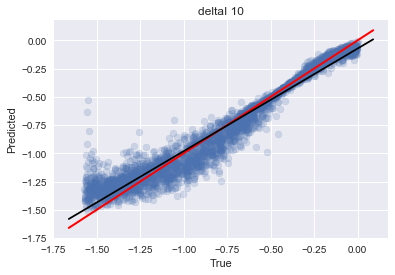

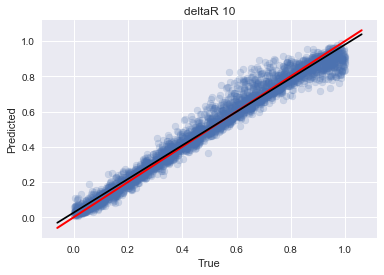

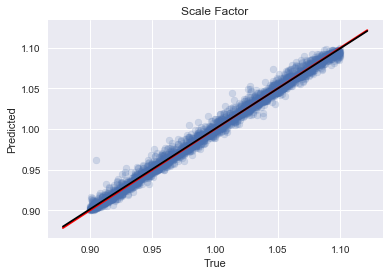

In [59]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_sf = RandomForestRegressor(max_depth = md, n_estimators = n, random_state=rs)

model_RF2_dr = regr_RF2_dr.fit(X_train, Y_train['deltaR'])
model_RF2_di = regr_RF2_di.fit(X_train, Y_train['deltaI'])
model_RF2_sf = regr_RF2_sf.fit(X_train, Y_train['scale_factor'])

predict_RF2_dr = model_RF2_dr.predict(X_test)
predict_RF2_di = model_RF2_di.predict(X_test)
predict_RF2_sf = model_RF2_sf.predict(X_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_sf.score(X_test, Y_test['scale_factor']), 'for delta I/R 10')

plotSummary(Y_test['deltaR'], predict_RF2_dr, 'deltaI 10')
plotSummary(Y_test['deltaI'], predict_RF2_di, 'deltaR 10')

plotSummary(Y_test['scale_factor'], predict_RF2_sf, 'Scale Factor')

## AdaBoost Random Forest

 
RMSE on test data: 0.05118020002566998 for  AdaBoost Delta I
R^2 Score on test data: 0.9683928654767319 for AdaBoost Delta I
 
RMSE on test data: 0.11444384365330786 for  AdaBoost Delta R
R^2 Score on test data: 0.936529061692577 for AdaBoost Delta R
 
RMSE on test data: 0.005811800944186504 for  AdaBoost Scale Factor
R^2 Score on test data: 0.9897946155466258 for AdaBoost Scale Factor
Delta I AdaBoost Score: 0.9683928654767319
Delta R AdaBoost Score: 0.936529061692577
Scale Factor AdaBoost Score: 0.9897946155466257


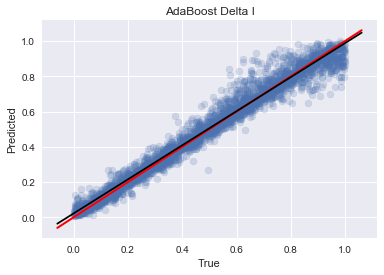

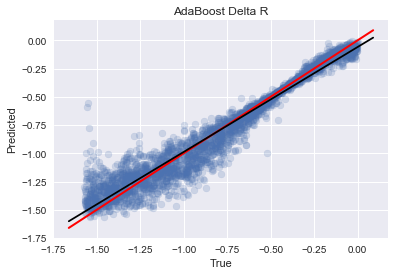

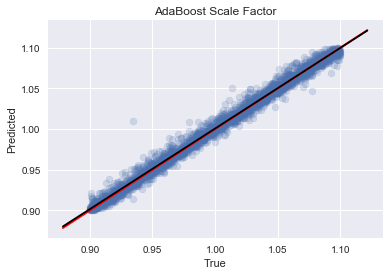

In [6]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_sf = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB = regr_AB.fit(X_train, Y_train['deltaI'])
model_AB_R = regr_ABR.fit(X_train, Y_train['deltaR'])
model_AB_sf = regr_AB_sf.fit(X_train, Y_train['scale_factor'])

y_pred_AB1 = model_AB.predict(X_test)
y_pred_AB1_R = model_AB_R.predict(X_test)
y_pred_AB1_sf = model_AB_sf.predict(X_test)


plotSummary(Y_test['deltaI'], y_pred_AB1, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_AB1_R, 'AdaBoost Delta R')
plotSummary(Y_test['scale_factor'], y_pred_AB1_sf, 'AdaBoost Scale Factor')

print('Delta I AdaBoost Score:', model_AB.score(X_test, Y_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_R.score(X_test, Y_test['deltaR']))
print('Scale Factor AdaBoost Score:', model_AB_sf.score(X_test, Y_test['scale_factor']))



## Gradient Boosting Random Forest

In [7]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GBR = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_sf = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)



In [8]:
model_GB = regr_GB.fit(X_train, Y_train['deltaI'])


In [9]:
model_GB_R = regr_GBR.fit(X_train, Y_train['deltaR'])


In [10]:
model_GB_sf = regr_GB_sf.fit(X_train, Y_train['scale_factor'])

 
RMSE on test data: 0.06614886940705227 for  GradientBoost Delta I
R^2 Score on test data: 0.9472009609210966 for GradientBoost Delta I
 
RMSE on test data: 0.1507377693736433 for  GradientBoost Delta R
R^2 Score on test data: 0.889888110164723 for GradientBoost Delta R
 
RMSE on test data: 0.006616740924649864 for  GradientBoost Scale Factor
R^2 Score on test data: 0.98677193962744 for GradientBoost Scale Factor
Delta I Gradient Boost Score: 0.9472009609210966
Delta R Gradient Boost Score: 0.889888110164723
Scale Factor Gradient Boost Score: 0.98677193962744


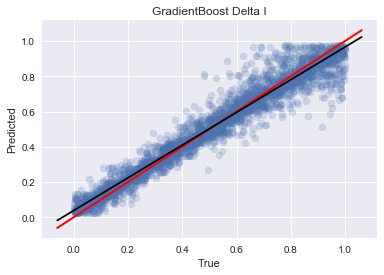

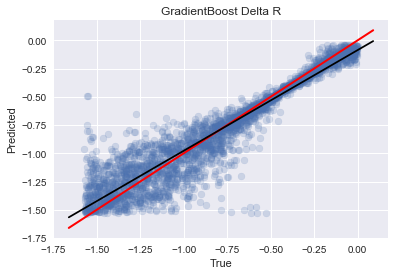

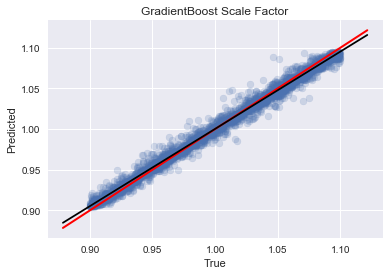

In [11]:
y_pred_GB1 = model_GB.predict(X_test)
y_pred_GB1_R = model_GB_R.predict(X_test)
y_pred_GB1_sf = model_GB_sf.predict(X_test)

plotSummary(Y_test['deltaI'], y_pred_GB1, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_GB1_R, 'GradientBoost Delta R')
plotSummary(Y_test['scale_factor'], y_pred_GB1_sf, 'GradientBoost Scale Factor')

print('Delta I Gradient Boost Score:', model_GB.score(X_test, Y_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_R.score(X_test, Y_test['deltaR']))
print('Scale Factor Gradient Boost Score:', model_GB_sf.score(X_test, Y_test['scale_factor']))

## Testing the Models on the Experimental Data



In [60]:
# Load the experimental data
col_names2 = peak_names + locs_names + width_names + prom_names
exp_data = pd.read_csv('Training_Data/Hexagon/HexagonExperimental_v5.csv', header = None, names = col_names2)

pred_phase_OLS_R = results_OLS_R.predict(exp_data)
pred_phase_OLS_I = results_OLS_I.predict(exp_data)
pred_scale_factor_OLS = results_OLS_sf.predict(exp_data)

pred_phase_DT = np.append(regr_DT.predict(exp_data),r2_score(Y_test['scale_factor'], y_pred_DT[:,2])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))

pred_phase_RF = regr_RF.predict(exp_data)

pred_phase_AB_R = model_AB_R.predict(exp_data)
pred_phase_AB_I = model_AB.predict(exp_data)
pred_sf_AB = model_AB_sf.predict(exp_data)

pred_phase_GB_I = model_GB.predict(exp_data)
pred_phase_GB_R = model_GB_R.predict(exp_data)
pred_sf_GB = model_GB_sf.predict(exp_data)

pred_phase_IRF_di = model_RF2_di.predict(exp_data)
pred_phase_IRF_dr = model_RF2_dr.predict(exp_data)
pred_phase_IRF_sf = model_RF2_sf.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT, columns = ['deltaI', 'deltaR', 'scale_factor', 'scale_factor_score'], index = ['Decision Tree'])

predictedPhases.loc['OLS'] = (pred_phase_OLS_I[0], pred_phase_OLS_R[0], pred_scale_factor_OLS[0],r2_score(Y_test['scale_factor'], predictions_OLS_sf))
predictedPhases.loc['Random Forest'] = np.append(pred_phase_RF[0], r2_score(Y_test['scale_factor'], predict_RF[:,2]))
predictedPhases.loc['AdaBoost'] = (pred_phase_AB_I[0], pred_phase_AB_R[0], pred_sf_AB[0],r2_score(Y_test['scale_factor'], y_pred_AB1_sf))
predictedPhases.loc['Gradient Boosting'] = (pred_phase_GB_I[0], pred_phase_GB_R[0], pred_sf_GB[0], r2_score(Y_test['scale_factor'], y_pred_GB1_sf))
predictedPhases.loc['Independent Random Forests'] = (pred_phase_IRF_di[0], pred_phase_IRF_dr[0], pred_phase_IRF_sf[0], r2_score(Y_test['scale_factor'], predict_RF2_sf))

predictedPhases

,deltaI,deltaR,scale_factor,scale_factor_score
Decision Tree,0.143710,-0.150405,1.042340,0.693197
OLS,1.085187,-0.949142,1.275530,0.828993
Random Forest,0.293647,-0.044474,1.014971,0.942960
AdaBoost,0.273230,-0.014017,0.948780,0.989795
Gradient Boosting,0.300867,-0.037849,0.947422,0.986772
Independent Random Forests,0.281355,-0.016273,0.949196,0.991585


In [41]:
pred_phase_DT.reshape(4,1)



array([[ 0.14371   ],
       [-0.150405  ],
       [ 1.04234   ],
       [ 0.69319693]])

## TRAINING A SECOND SET OF MODELS WITH FIRST PREDICTED SCALE FACTOR

Used a scale factor of 0.964 when generating training data

In [24]:
#Load the training data

#energy = (pd.read_csv('HexagonBias_v3.csv', header=None)*1000).round().astype(int)
energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)

energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names = ['deltaI', 'deltaR']+ energy_names

#data = pd.read_csv('HexagonTrainingData052818_specPoints.csv', header = None, names = col_names)
#data = pd.read_csv('HexagonTrainingData060518_v3.csv', header = None, names = col_names)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData060618_v5.csv', header = None, names = col_names)


data2.head()

X2 = data2.drop(['deltaI', 'deltaR'], axis = 1)
Y2 = data2[['deltaI', 'deltaR']]

ts1 = 0.3
rs1 = 42

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1 )
data2.head()

,deltaI,deltaR,E_-400_mV,E_-398_mV,E_-396_mV,E_-394_mV,E_-392_mV,E_-390_mV,E_-388_mV,E_-386_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.81472,-0.147980,0.146410,0.140510,0.137420,0.136640,0.137930,0.141230,0.146790,0.154270,...,1.1335,1.1490,1.16190,1.17160,1.17770,1.1793,1.17680,1.17010,1.15940,1.14460
1,0.12699,-0.136070,0.248730,0.250010,0.255530,0.265280,0.279410,0.298410,0.323420,0.354720,...,0.9333,0.9257,0.91819,0.91091,0.90379,0.8969,0.89025,0.88397,0.87806,0.87245
2,0.63236,-1.417600,0.078366,0.074908,0.073144,0.072517,0.073092,0.074697,0.077583,0.081380,...,1.0250,1.0951,1.17190,1.25340,1.33730,1.4204,1.49910,1.56760,1.62160,1.65610
3,0.27850,-0.711760,0.058813,0.057001,0.056270,0.056455,0.057543,0.059512,0.062651,0.066466,...,1.9902,1.9255,1.82300,1.69600,1.55880,1.4189,1.28570,1.16340,1.05340,0.95498
4,0.95751,-0.055153,0.142160,0.136130,0.132890,0.131890,0.132890,0.135840,0.140930,0.147850,...,1.1125,1.1322,1.15030,1.16560,1.17780,1.1858,1.18970,1.18900,1.18400,1.17430


### DECISION TREE - JUST PHASE

 
RMSE on test data: 0.010578751086137601 for  deltaI Depth 30
R^2 Score on test data: 0.9986689299668658 for deltaI Depth 30
 
RMSE on test data: 0.010693784405371654 for  deltaR Depth 30
R^2 Score on test data: 0.9994430275651497 for deltaR Depth 30
 
Regression - Decision Tree -  Score:  0.9992181356778069 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.99904924 0.99910035 0.99904711 0.99905938 0.9990457  0.9991018
 0.99860326 0.99910287 0.99914475 0.99910185]


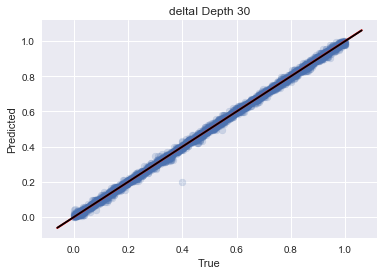

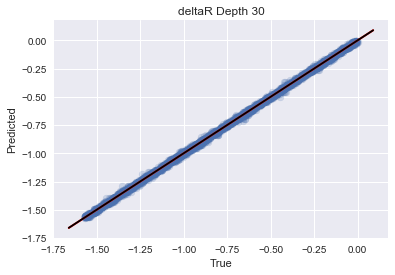

In [25]:
#Initialize the model
regr_DT_2 = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2)

#Fit the model
regr_DT_2.fit(X2_train, Y2_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_DT_2.feature_importances_.T, columns = ['Regr - DT']) 

data1.index = X2_train.columns

#print(data1[data1['Regr - DT']>0.001])


#Use model to predict
y_pred_DT_2 = regr_DT_2.predict(X2_test)

#Plot results
plotSummary(Y2_test['deltaI'], y_pred_DT_2[:,0], 'deltaI Depth 30')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], y_pred_DT_2[:,1], 'deltaR Depth 30')
#myResiduals(Y_test['deltaR'], y_3[:,1])
#plotSummary(Y_test['scale_factor'], y_pred_DT[:,2], 'scale factor - DT')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT_2.score(X2_test,Y2_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X2, Y2, cv=10))

### RANDOM FOREST - JUST PHASE


Score - Random Forest: 0.9998733596759214 for delta I/R 10
 
RMSE on test data: 0.004478631321149679 for  deltaI 10
R^2 Score on test data: 0.9997614262070802 for deltaI 10
 
RMSE on test data: 0.004073185076809497 for  deltaR 10
R^2 Score on test data: 0.9999191948312431 for deltaR 10


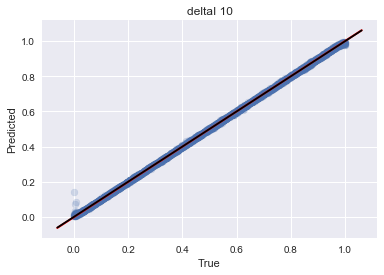

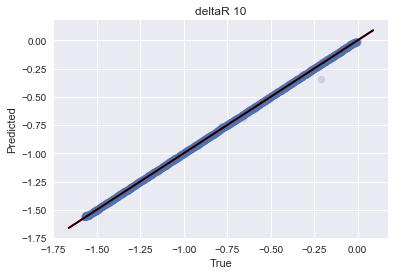

In [26]:
rs = 42
regr_RF_2 = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_2 = regr_RF_2.fit(X2_train, Y2_train)

predict_RF_2 = model_RF_2.predict(X2_test)


importance_RF_10_2 = pd.Series(model_RF_2.feature_importances_, index = X2_train.columns)

print('')
print('Score - Random Forest:' , model_RF_2.score(X2_test, Y2_test), 'for delta I/R 10')

plotSummary(Y2_test['deltaI'], predict_RF_2[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predict_RF_2[:,1], 'deltaR 10')


## TEST EXPERIMENTAL DATA ON SECOND VERSIONS OF MODELS


In [27]:
# Load the experimental data
exp_data = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData060618_v3.csv', header = None, names = energy_names)


pred_phase_DT_2 = regr_DT_2.predict(exp_data)

pred_phase_RF_2 = regr_RF_2.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT_2, columns = ['deltaI', 'deltaR'], index = ['Decision Tree'])

predictedPhases.loc['Random Forest'] = pred_phase_RF_2[0]

print(predictedPhases)
predictedPhases.mean()

                 deltaI    deltaR
Decision Tree  0.164965 -0.089918
Random Forest  0.180288 -0.101343


deltaI    0.172626
deltaR   -0.095630
dtype: float64